# Tips da ricordare

#1 Tip: FOR LOOP WITH INDEXES

In [28]:
items = ['ciao', 'hola', 'hello']
for index, item in enumerate(items):
    print(index, item)

0 ciao
1 hola
2 hello


In [29]:
for index in range(len(items)-1):
    print(items[index], items[index+1])

ciao hola
hola hello


In [30]:
for index in range(1, len(items)-1):
    print(items[index], items[index+1])

hola hello


# Importo i dati

In [75]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import datasets
from sklearn.datasets import make_blobs
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics.pairwise import haversine_distances
from math import radians

In [46]:
df = pd.read_csv('../df.csv')
df.drop(['Unnamed: 0'], axis='columns', inplace=True)
df

,Screen_name,UserID,TweetID,Coords,Lat,Lon,Created_At,Text
0,madikeeper12,868809325,779072240994234368,"[43.72666207, 10.41268069]",43.726662,10.412681,Thu Sep 22 21:37:51 +0000 2016,Cieli infuocati.\n\n#picoftheday #quotesofthed...
1,madikeeper12,868809325,781615843406819329,"[43.72666207, 10.41268069]",43.726662,10.412681,Thu Sep 29 22:05:13 +0000 2016,Prospettive.. \nunite a casa #ilselfone\n#team...
2,madikeeper12,868809325,781870800156499968,"[43.72666207, 10.41268069]",43.726662,10.412681,Fri Sep 30 14:58:19 +0000 2016,"Non occorre essere matti per lavorare qui, ma ..."
3,madikeeper12,868809325,780003801260404736,"[43.7167, 10.3833]",43.716700,10.383300,Sun Sep 25 11:19:32 +0000 2016,RunOnSunDay 🏃🏽‍♀️☀️\n#run #running #runner #ni...
4,madikeeper12,868809325,779443101123260417,"[43.70561, 10.42059]",43.705610,10.420590,Fri Sep 23 22:11:31 +0000 2016,La vita è come la fotografia sono necessari i ...
...,...,...,...,...,...,...,...,...
632,antoniocassisa,358042635,781879291911016448,"[43.7167, 10.3833]",43.716700,10.383300,Fri Sep 30 15:32:04 +0000 2016,"I mì ómini \n#son #figli #boys @ Pisa, Italy h..."
633,SefaMermer,293157588,780753755830677504,"[43.7167, 10.3833]",43.716700,10.383300,Tue Sep 27 12:59:35 +0000 2016,#love #tbt #tagforlikes #TFLers #tweegram #pho...
634,SefaMermer,293157588,780756143668953088,"[43.7167, 10.3833]",43.716700,10.383300,Tue Sep 27 13:09:05 +0000 2016,#love #tbt #tagforlikes #TFLers #tweegram #pho...
635,matteluca89,494389053,779638196258811904,"[43.71544235, 10.40051616]",43.715442,10.400516,Sat Sep 24 11:06:45 +0000 2016,Last saturday I went out with my #chinese teac...


In [48]:
X = df[['Lat', 'Lon']]
X

,Lat,Lon
0,43.726662,10.412681
1,43.726662,10.412681
2,43.726662,10.412681
3,43.716700,10.383300
4,43.705610,10.420590
...,...,...
632,43.716700,10.383300
633,43.716700,10.383300
634,43.716700,10.383300
635,43.715442,10.400516


In [49]:
points = X.values.tolist()
points

[[43.72666207, 10.41268069],
 [43.72666207, 10.41268069],
 [43.72666207, 10.41268069],
 [43.7167, 10.3833],
 [43.70561, 10.420589999999999],
 [43.72305556, 10.39641667],
 [43.72305556, 10.39641667],
 [43.72075, 10.396939999999999],
 [43.72305556, 10.39641667],
 [43.716409999999996, 10.40231],
 [43.72305556, 10.39641667],
 [43.7215, 10.3961],
 [43.7162, 10.4021],
 [43.7167, 10.3833],
 [43.72040817, 10.39710583],
 [43.72305556, 10.39641667],
 [43.72305556, 10.39641667],
 [43.71818383, 10.40229555],
 [43.71656, 10.40238],
 [43.71779, 10.40178],
 [43.7167, 10.3833],
 [43.7225109, 10.3960052],
 [43.7225109, 10.3960052],
 [43.72305556, 10.39641667],
 [43.7167, 10.3833],
 [43.7167, 10.3833],
 [43.7167, 10.3833],
 [43.71502502, 10.41033667],
 [43.72305556, 10.39641667],
 [43.72263, 10.3948],
 [43.7167, 10.3833],
 [43.69854949, 10.40007198],
 [43.72305556, 10.39641667],
 [43.72305556, 10.39641667],
 [43.7225109, 10.3960052],
 [43.7225109, 10.3960052],
 [43.7167, 10.3833],
 [43.7167, 10.3833],
 

Normalizzo il df:

In [50]:
X_norm = StandardScaler().fit_transform(X)
X_norm

array([[ 1.21862633,  2.50548165],
       [ 1.21862633,  2.50548165],
       [ 1.21862633,  2.50548165],
       ...,
       [-0.46658272, -1.48740575],
       [-0.67932998,  0.85230065],
       [ 0.53655113,  0.07546446]])

## Bisecting Kmeans: steps da fare
1. Set K to define the number of cluster.
2. Set all data as a single cluster: parto da un unico grande cluster che è X
3. Use K-means with K=2 to split the cluster.
4. Measure the distance for each intra cluster: creo una lista di punti in cui includo solo i punti che distano dal centroide meno di 50/100 metri e che formino un gruppo di almeno 3/5 punti. 
5. Select the cluster that have the largest distance and split to 2 cluster using K-means.
6. Repeat step 3-5 finché non ci sono meno di 3/5 punti nei punti o se tra di loro ci sia una distanza maggiore di 50/100 metri. 

NB: per la distanza uso la <b>haversine distance</b>.

### Definisco le funzioni:

In [36]:
# DEFINISCO LE FUNZIONI DA USARE

# Converts points to a 2-D numpy array
def convert_to_2d_array(points):
    points = np.array(points)
    if len(points.shape) == 1:
        points = np.expand_dims(points, -1)
    return points

# Trasforma i punti in radianti
def transform_points_in_radians (points):
    points_in_radians = list()
    for point in points:
        point_in_radians = [radians(_) for _ in point]
        points_in_radians.append(point_in_radians)
    return points_in_radians

def kmeans(X):
    kmeans = KMeans(n_clusters= 2, n_init= 10, max_iter=100).fit(X)
    #sse = kmeans.inertia_
    return kmeans

# Trova il centroide del cluster
def find_centroid(points):
    lat = list()
    lon = list()
    for i in range(len(points)):
        lat.append(points[i][0])
    for i in range(len(points)):
        lon.append(points[i][1])
    lat_mean = np.mean(lat)
    lon_mean = np.mean(lon)
    centroid = [lat_mean, lon_mean]
    return centroid
    
# It takes the cluster points in radians and calculates the haversine distance for the given list of data points
def HD(points_in_radians, centroid):
    points_in_HD = list()
    for i in range(len(points_in_radians)):
        h_distance = haversine_distances([points_in_radians[i], centroid])
        result = h_distance * 6371000  # multiply by Earth radius to get meters
        points_in_HD.append(result)
    return points_in_HD

def clean_distances(points_in_HD):
    distances_cleaned = list()
    for point in points_in_HD:
        distances_cleaned.append(point[0][1])
    return distances_cleaned 

def SSE(points): # calculates the sum of squared errors for the given list of data points
    points = convert_to_2d_array(points)
    centroid = np.mean(points, 0) #trova i centroidi
    errors = np.linalg.norm(points-centroid, ord=2, axis=1)
    return np.sum(errors)

def check_distance(distances):
    max_cluster = list()
    min_cluster = list()
    for point in df_values:
        #print('point', point, type(point))
        if (point[2]>100): # seleziono i punti lontani più di 100m dal centoride
            max_cluster.append(point)
        else:
            min_cluster.append(point)
    #distances.extend(max_cluster)
    #distances.extend(min_cluster)
    return max_cluster, min_cluster

'''
def return_clusters(kmeans, cluster_2d):
    center_1 = kmeans.cluster_centers_[0] # memorizzo i centroidi dei due clusters
    center_2 = kmeans.cluster_centers_[1]
    # trova alternativa:
    df_clusters = pd.DataFrame(cluster_2d)
    df_clusters = df_clusters.rename(columns={0 : "lat", 1 : "lon", 2 : "dist"})
    df_clusters.insert(3, "Cluster", kmeans.labels_)
    cluster_0 = list()
    cluster_1 = list()
    for index, row in df_clusters.iterrows():
        if row['Cluster'] == 0:
            cluster_0.append([row["lat"],row["lon"],row["dist"]])
        else:
            cluster_1.append([row["lat"],row["lon"],row["dist"]])
    return cluster_0, cluster_1
'''

def return_clusters(kmeans, cluster_2d):
    center_1 = kmeans.cluster_centers_[0] # memorizzo i centroidi dei due clusters
    center_2 = kmeans.cluster_centers_[1]
    # trova alternativa:
    df_clusters = pd.DataFrame(cluster_2d)
    df_clusters = df_clusters.rename(columns={0 : "lat", 1 : "lon"})
    df_clusters.insert(2, "Cluster", kmeans.labels_)
    cluster_0 = list()
    cluster_1 = list()
    for index, row in df_clusters.iterrows():
        if row['Cluster'] == 0:
            cluster_0.append([row["lat"],row["lon"]])
        else:
            cluster_1.append([row["lat"],row["lon"]])
    return cluster_0, cluster_1

def bisecting_kmeans(cluster, clusters): #cluster e clusters
    cluster_2d = convert_to_2d_array(cluster)
    kmeans = KMeans(n_clusters= 2, n_init= 10, max_iter=100).fit(cluster_2d) # applico kmeans
    cluster_0, cluster_1 = return_clusters(kmeans, cluster_2d) # memorizzo i due clusters ottenuti
    clusters.append([cluster_0]) # aggiungo alla lista dei clusters anche gli ultimi due ottenuti
    clusters.append([cluster_1])
    # calcolo la massima sse tra i clusters per scegliere il cluster su cui riapplicare il bisecting kmeans
    max_sse_i = np.argmax([SSE(c) for c in clusters])
    cluster = clusters.pop(max_sse_i)
    return cluster, clusters

In [54]:
# MAIN
'''
points_in_radians = transform_points_in_radians(points) # converto lat e long in radianti
centroid = find_centroid(points_in_radians) # cerco il primo centroide facendo la media
points_in_HD = HD(points_in_radians, centroid) # trovo le distanze dal centroide per ogni punto
points_in_HD_2d = convert_to_2d_array(points_in_HD) # converto il risultato in un arrray bidimensionale
distances = clean_distances(points_in_HD_2d) # ripulisco le distanze dai doppioni
df_with_distances = X.copy() # creo un nuovo dataframe per aggiungere le distanze
df_with_distances.insert(2, "Meters_from_centroid", distances, True)
df_values = df_with_distances.values.tolist()

max_cluster, min_cluster = check_distance(df_values) # divido il primo cluster in base alla distanza dal centroide
clusters = [max_cluster] + [min_cluster]
cluster = clusters.pop(0) # memorizzo in cluster il cluster con le distanze più lontane dal centroide
'''
clusters = list()
cluster = X_norm
while (len(cluster) > 5):
    cluster_2d = convert_to_2d_array(cluster)
    kmeans = KMeans(n_clusters= 2, n_init= 10, max_iter=100).fit(cluster_2d) # applico kmeans
    cluster_0, cluster_1 = return_clusters(kmeans, cluster_2d) # memorizzo i due clusters ottenuti
    clusters.append(cluster_0)
    clusters.append(cluster_1)
    # calcolo la massima sse tra i clusters per scegliere il cluster su cui riapplicare il bisecting kmeans
    max_sse_i = np.argmax([SSE(c) for c in clusters])
    cluster = clusters.pop(max_sse_i)

In [55]:
# print the clusters:
for i in range(0, len(clusters)):
    print('Cluster', i, 'length', len(clusters[i]), '=', clusters[i])
    print()

Cluster 0 length 4 = [[-2.3425952673970385, 3.5803707717331856], [-2.3425952673970385, 3.5803707717331856], [-2.2897015249505084, 3.4041061928606915], [-2.3425952673970385, 3.5803707717331856]]

Cluster 1 length 11 = [[1.964282955345296, -1.5662287671298507], [1.964282955345296, -1.5662287671298507], [1.964282955345296, -1.5662287671298507], [1.964282955345296, -1.5662287671298507], [1.964282955345296, -1.5662287671298507], [1.964282955345296, -1.5662287671298507], [1.964282955345296, -1.5662287671298507], [1.964282955345296, -1.5662287671298507], [1.964282955345296, -1.5662287671298507], [1.964282955345296, -1.5662287671298507], [1.964282955345296, -1.5662287671298507]]

Cluster 2 length 17 = [[1.3180820593950244, -0.651609942293474], [1.3180820593950244, -0.651609942293474], [1.3180820593950244, -0.651609942293474], [1.3180820593950244, -0.651609942293474], [1.3180820593950244, -0.651609942293474], [1.3180820593950244, -0.651609942293474], [1.3180820593950244, -0.651609942293474], [1

In [56]:
X_new = pd.DataFrame()

In [57]:
for i in range(0, len(clusters)):
    for z in range (0, len(clusters[i])):
        clusters[i][z].append(i)
        df_row = pd.DataFrame([clusters[i][z]], columns = ['Lat', 'Lon', 'Cluster'])
        X_new = pd.concat([X_new, df_row], ignore_index = True, axis = 0)
X_new

,Lat,Lon,Cluster
0,-2.342595,3.580371,0
1,-2.342595,3.580371,0
2,-2.289702,3.404106,0
3,-2.342595,3.580371,0
4,1.964283,-1.566229,1
...,...,...,...
629,0.516404,0.239253,34
630,0.516404,0.239253,34
631,0.535584,0.275141,34
632,0.516404,0.239253,34


In [59]:
labels = X_new['Cluster'].values.tolist()
labels

[0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10

In [67]:
X_new_values = X_new[['Lat', 'Lon']].values.tolist()
X_new_values = convert_to_2d_array(X_new_values)
X_new_values

array([[-2.34259527,  3.58037077],
       [-2.34259527,  3.58037077],
       [-2.28970152,  3.40410619],
       ...,
       [ 0.53558352,  0.27514083],
       [ 0.51640387,  0.23925326],
       [ 0.51640387,  0.23925326]])

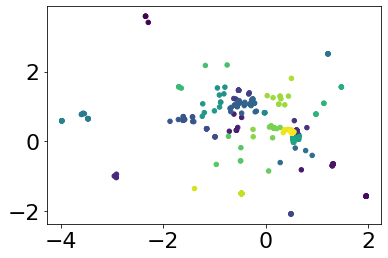

In [68]:
plt.scatter(X_new_values[:,0], X_new_values[:,1], 
            c=labels, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [85]:
X_den = StandardScaler().inverse_transform(X_norm, copy=None)
X_den

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [72]:
import folium
from folium import plugins

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

lat = [43.7359, 43.6955]
lon = [10.4269, 10.3686]

lat_mean = np.mean(lat)
lon_mean = np.mean(lon)

lat, lng = (lat_mean, lon_mean)

In [73]:
mappa = folium.Map(location=[lat, lng], zoom_start=13.2)

# set color scheme for the clusters
x = np.arange(35)
ys = [i + x + (i*x)**2 for i in range(44)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors1 = []
for lat, lng, cluster in zip(X_new['Lat'], X_new['Lon'],  
                                            X_new['Cluster']):
    #label = folium.Popup(str(city)+ ','+str(state) + '- Cluster ' + str(cluster), parse_html=True)
    folium.vector_layers.CircleMarker(
        [lat, lng],
        radius=5,
        #popup=label,
        tooltip = 'Cluster ' + str(cluster),
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(mappa)

print('Mappa con clustering Bisecting Kmeans')
mappa

Mappa con clustering Bisecting Kmeans
